<a href="https://colab.research.google.com/github/RafsanJany-44/Rhythms_off_Algorithms/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#Data Set

In [2]:
!pip install tensorflow_datasets

#GPU setup

In [3]:
!nvidia-smi

Thu Nov 11 05:14:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:

tf.config.list_physical_devices("GPU")
tf.test.gpu_device_name()
# Standard output is '/device:GPU:0'
gpus = tf.config.list_physical_devices("GPU")

#tf.config.experimental.set_memory_growth(gpus[0],True)

#tf.config.experimental.set_visible_devices(gpus[0],'GPU')
#logical_gpus= tf.config.experimental.list_logical_devices('GPU')
#print(len(gpus),"Physical GPUs", len(logical_gpus),"Logical GPU")

#Available Data set

In [5]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [6]:
tfds.builder("imdb_reviews").info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

In [7]:
imdb_train,ds_info=tfds.load(name="imdb_reviews",split="train",with_info=True,as_supervised=True)
imdb_test = tfds.load(name="imdb_reviews",split="test",as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteFTIZFM/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteFTIZFM/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteFTIZFM/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [8]:
type(imdb_train)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [9]:
for example,label in imdb_train.take(3):
  print(example,"\n",label)

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string) 
 tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on

In [10]:
tokenizer = tfds.deprecated.text.Tokenizer()
vocabulary_set = set()

for example,label in imdb_train:
  some_token=tokenizer.tokenize(example.numpy())
  vocabulary_set.update(some_token)

In [11]:
some_token

['First',
 'of',
 'all',
 'Riget',
 'is',
 'wonderful',
 'Good',
 'comedy',
 'and',
 'mystery',
 'thriller',
 'at',
 'the',
 'same',
 'time',
 'Nice',
 'combination',
 'of',
 'strange',
 'dogma',
 'style',
 'of',
 'telling',
 'the',
 'story',
 'together',
 'with',
 'good',
 'music',
 'and',
 'great',
 'actors',
 'But',
 'unfortunately',
 'there',
 's',
 'no',
 'the',
 'end',
 'As',
 'for',
 'me',
 'it',
 's',
 'unacceptable',
 'I',
 'was',
 'thinking',
 'how',
 'it',
 'will',
 'be',
 'possible',
 'to',
 'continue',
 'the',
 'story',
 'without',
 'Helmer',
 'and',
 'Drusse',
 'and',
 'I',
 'have',
 'some',
 'idea',
 'I',
 'think',
 'Lars',
 'should',
 'make',
 'RIGET',
 'III',
 'a',
 'little',
 'bit',
 'different',
 'I',
 'm',
 'sure',
 'that',
 '3rd',
 'part',
 'without',
 'Helmer',
 'wouldn',
 't',
 'be',
 'the',
 'same',
 'So',
 'here',
 's',
 'my',
 'suggestion',
 'Mayble',
 'little',
 'bit',
 'stupid',
 'maybe',
 'not',
 'I',
 'know',
 'that',
 'Lars',
 'likes',
 'to',
 'experiment

In [12]:
tokenizer = tfds.deprecated.text.Tokenizer()
vocabulary_set = set()
MAX_TOKENS=0

for example,label in imdb_train:
  some_token=tokenizer.tokenize(example.numpy())
  if MAX_TOKENS < len(some_token):
    MAX_TOKENS=len(some_token)
  vocabulary_set.update(some_token)

In [13]:
vocabulary_set

{'AO',
 'enhancer',
 'entrepreneur',
 'Rahoooooool',
 'vastly',
 'habitants',
 'calculation',
 'opulently',
 'unkind',
 'Whoopi',
 'curiousness',
 'Gregoire',
 'choses',
 'Marnac',
 'SIXTY',
 'spewing',
 'Kohut',
 'bludgeon',
 'Sevizia',
 'Redemption',
 'Ludicrious',
 'destroys',
 'Degrassi',
 'townfolks',
 'froing',
 'restaurateur',
 'horrormoviejournal',
 'Soapy',
 'puppety',
 'schizophrenia',
 'fairy',
 'shoveler',
 'Vow',
 'disengorges',
 'detatched',
 'Lister',
 'overprinting',
 'trident',
 'WWWWHHHYYYYYYY',
 'Markey',
 'feasibly',
 'Rawlings',
 '_everything_',
 'disobeyed',
 'Wartime',
 'Living',
 'Hadleys',
 'Ilene',
 'Sow',
 'matchmakes',
 'reinterpret',
 'benevolent',
 'Betty',
 'spur',
 'zest',
 'Morcheeba',
 'tripwires',
 'fisheye',
 'Arganauts',
 'Syd',
 'graduating',
 'intercalates',
 'cauldron',
 'Patience',
 'Sender',
 'michalka',
 'underutilized',
 'Madeline',
 'Kavalier',
 '18th',
 'shield',
 'toliet',
 'Ayats',
 'Marti',
 'extermination',
 'prank',
 'unprotected',
 'H

In [14]:
type(vocabulary_set)

set

In [15]:
len(vocabulary_set)

93929

In [16]:
encoder = tfds.deprecated.text.TokenTextEncoder(vocabulary_set, tokenizer=tokenizer)
sample_string = "Hello Dear How are you"
              
enocoded_string=encoder.encode(sample_string)
print('Encoded string is {}',format(enocoded_string))
                                                
orginal_string=encoder.decode(enocoded_string)
print('Orginal string is {}',format(orginal_string))


Encoded string is {} [62150, 55817, 76609, 8443, 83598]
Orginal string is {} Hello Dear How are you


In [17]:
imbd_encoder= encoder = tfds.deprecated.text.TokenTextEncoder(vocabulary_set, tokenizer=tokenizer)

vocab_size=imbd_encoder.vocab_size

print(vocab_size,MAX_TOKENS)

93931 2525


In [18]:
for example, label in imdb_train.take(1):
  print(example)
  encoded=imbd_encoder.encode(example.numpy())

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)


In [19]:
type(encoded)

list

In [20]:
encoded

[22491,
 33828,
 9691,
 27457,
 20624,
 1389,
 2277,
 34484,
 81450,
 73290,
 1673,
 25708,
 27738,
 77649,
 86730,
 92742,
 56225,
 66987,
 8443,
 71327,
 5604,
 27606,
 8520,
 78938,
 41254,
 81450,
 48492,
 92361,
 87295,
 1673,
 62111,
 85645,
 48492,
 71327,
 12528,
 59736,
 91884,
 27248,
 8520,
 1389,
 85967,
 28851,
 79812,
 22491,
 1389,
 77613,
 9691,
 26574,
 38855,
 35632,
 89422,
 52942,
 983,
 91133,
 58840,
 53503,
 73090,
 89323,
 6711,
 33157,
 6037,
 18711,
 73090,
 31549,
 48492,
 23657,
 41586,
 40159,
 75259,
 30953,
 24049,
 77961,
 83541,
 86085,
 60017,
 5251,
 36432,
 50712,
 85358,
 77649,
 33828,
 52231,
 27606,
 36818,
 58840,
 56392,
 25306,
 1673,
 36818,
 1389,
 49560,
 33828,
 27137,
 52088,
 55858,
 23935,
 49915,
 74431,
 76320,
 51117,
 49560,
 17414,
 8443,
 5130,
 17703,
 8520,
 71537,
 15937,
 85967,
 17703,
 27738,
 77649,
 85967,
 6048,
 60432,
 74431,
 59736,
 44975,
 60039,
 39758,
 61336]

In [21]:
print(imbd_encoder.decode(encoded))

This was an absolutely terrible movie Don t be lured in by Christopher Walken or Michael Ironside Both are great actors but this must simply be their worst role in history Even their great acting could not redeem this movie s ridiculous storyline This movie is an early nineties US propaganda piece The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions Maria Conchita Alonso appeared phony and her pseudo love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning I am disappointed that there are movies like this ruining actor s like Christopher Walken s good name I could barely sit through it


In [22]:
from tensorflow.keras.preprocessing import sequence

def encode_pad_transform(sample):
  encoded = imbd_encoder.encode(sample.numpy())
  pad = sequence.pad_sequences([encoded],padding='post',maxlen=150)
  return np.array(pad[0],dtype=np.int64)

def encode_tf_fn(sample,label):
  encoded = tf.py_function(encode_pad_transform,inp=[sample],Tout =(tf.int64))
  encoded.set_shape([None])
  label.set_shape([])
  return encoded, label


In [23]:
#test the transformation on a small subset
subset=imdb_train.take(10)
tst=subset.map(encode_tf_fn)

In [24]:
tst

<MapDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>

In [25]:
 for review,label in tst.take(1):
   print(review, "\n",label)
   print(imbd_encoder.decode(review))

tf.Tensor(
[22491 33828  9691 27457 20624  1389  2277 34484 81450 73290  1673 25708
 27738 77649 86730 92742 56225 66987  8443 71327  5604 27606  8520 78938
 41254 81450 48492 92361 87295  1673 62111 85645 48492 71327 12528 59736
 91884 27248  8520  1389 85967 28851 79812 22491  1389 77613  9691 26574
 38855 35632 89422 52942   983 91133 58840 53503 73090 89323  6711 33157
  6037 18711 73090 31549 48492 23657 41586 40159 75259 30953 24049 77961
 83541 86085 60017  5251 36432 50712 85358 77649 33828 52231 27606 36818
 58840 56392 25306  1673 36818  1389 49560 33828 27137 52088 55858 23935
 49915 74431 76320 51117 49560 17414  8443  5130 17703  8520 71537 15937
 85967 17703 27738 77649 85967  6048 60432 74431 59736 44975 60039 39758
 61336     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0], shape=(150,), dtype=int64) 
 tf.Tensor(0, shape=(), dtype=int64)
This was 

In [26]:
#tokenize.encode/pad all training
# and tetrsing data
encoded_train=imdb_train.map(encode_tf_fn,num_parallel_calls=tf.data.experimental.AUTOTUNE)
encoded_test=imdb_test.map(encode_tf_fn,num_parallel_calls=tf.data.experimental.AUTOTUNE)

#preparing the model

In [27]:
#length of the vocabulary in chars
vocab_size=imbd_encoder.vocab_size

# The embedding dimension
embedding_dim=64

#NUmber of RNN units, positive integer, dimensionality of the output space
rnn_units=64

#batch size
BATCH_SIZE=100

In [28]:
def build_model_lstm(vocab_size,embedding_dim,rnn_units,batch_size):
  model = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size,embedding_dim,mask_zero=True,batch_input_shape=[batch_size,None]),
                tf.keras.layers.LSTM(rnn_units),
                tf.keras.layers.Dense(1,activation="sigmoid")
  ])
  return model

In [29]:
model= build_model_lstm(vocab_size=vocab_size, embedding_dim=embedding_dim,
                       rnn_units=rnn_units,batch_size=BATCH_SIZE)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (100, None, 64)           6011584   
                                                                 
 lstm (LSTM)                 (100, 64)                 33024     
                                                                 
 dense (Dense)               (100, 1)                  65        
                                                                 
Total params: 6,044,673
Trainable params: 6,044,673
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.save('model.h5')

In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy','Precision','Recall'])

#Model training and evalution

In [32]:
#Prefetch for performanence
encoded_train_batched=encoded_train.batch(BATCH_SIZE).prefetch(100)

In [33]:
model.fit(encoded_train.batch(100),epochs=10)

Epoch 1/10
250/250 [==============================] - 48s 155ms/step - loss: 0.4178 - accuracy: 0.7981 - precision: 0.7805 - recall: 0.8295
Epoch 2/10
250/250 [==============================] - 38s 154ms/step - loss: 0.1723 - accuracy: 0.9392 - precision: 0.9395 - recall: 0.9388
Epoch 3/10
250/250 [==============================] - 39s 155ms/step - loss: 0.1134 - accuracy: 0.9616 - precision: 0.9605 - recall: 0.9628
Epoch 4/10
250/250 [==============================] - 39s 154ms/step - loss: 0.0843 - accuracy: 0.9708 - precision: 0.9717 - recall: 0.9698
Epoch 5/10
250/250 [==============================] - 38s 153ms/step - loss: 0.0491 - accuracy: 0.9845 - precision: 0.9860 - recall: 0.9829
Epoch 6/10
250/250 [==============================] - 38s 154ms/step - loss: 0.0498 - accuracy: 0.9828 - precision: 0.9823 - recall: 0.9833
Epoch 7/10
250/250 [==============================] - 38s 153ms/step - loss: 0.0446 - accuracy: 0.9856 - precision: 0.9859 - recall: 0.9854
Epoch 8/10
250/250 [

In [34]:
hisotry=model.fit(encoded_train.batch(100),epochs=10)

Epoch 1/10
250/250 [==============================] - 38s 153ms/step - loss: 0.0061 - accuracy: 0.9986 - precision: 0.9984 - recall: 0.9987
Epoch 2/10
250/250 [==============================] - 38s 154ms/step - loss: 0.0065 - accuracy: 0.9980 - precision: 0.9980 - recall: 0.9981
Epoch 3/10
250/250 [==============================] - 39s 155ms/step - loss: 0.0107 - accuracy: 0.9966 - precision: 0.9965 - recall: 0.9967
Epoch 4/10
250/250 [==============================] - 38s 154ms/step - loss: 0.0137 - accuracy: 0.9957 - precision: 0.9953 - recall: 0.9962
Epoch 5/10
250/250 [==============================] - 39s 155ms/step - loss: 0.0107 - accuracy: 0.9968 - precision: 0.9967 - recall: 0.9969
Epoch 6/10
250/250 [==============================] - 39s 154ms/step - loss: 0.0060 - accuracy: 0.9983 - precision: 0.9984 - recall: 0.9982
Epoch 7/10
250/250 [==============================] - 38s 154ms/step - loss: 0.0066 - accuracy: 0.9983 - precision: 0.9980 - recall: 0.9986
Epoch 8/10
250/250 [

In [35]:
result=model.evaluate(encoded_test.batch(BATCH_SIZE))

250/250 [==============================] - 34s 128ms/step - loss: 1.2214 - accuracy: 0.8332 - precision: 0.8607 - recall: 0.7951


In [37]:
print(hisotry.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall'])


In [38]:
hisotry.history

{'accuracy': [0.9985600113868713,
  0.9980400204658508,
  0.9965999722480774,
  0.9957200288772583,
  0.9968000054359436,
  0.9983199834823608,
  0.9983199834823608,
  0.999239981174469,
  0.9997199773788452,
  0.9995599985122681],
 'loss': [0.0061263227835297585,
  0.006527145858854055,
  0.010706106200814247,
  0.013665507547557354,
  0.010716778226196766,
  0.005950519349426031,
  0.006613193545490503,
  0.0030556817073374987,
  0.000947893422562629,
  0.002154681598767638],
 'precision': [0.9984005093574524,
  0.9980001449584961,
  0.9964808225631714,
  0.9952841401100159,
  0.996720552444458,
  0.9983997344970703,
  0.9980012774467468,
  0.9992799162864685,
  0.9999199509620667,
  0.9995200634002686],
 'recall': [0.9987199902534485,
  0.9980800151824951,
  0.996720016002655,
  0.9961599707603455,
  0.9968799948692322,
  0.9982399940490723,
  0.9986400008201599,
  0.9991999864578247,
  0.9995200037956238,
  0.9995999932289124]}

In [41]:
test_loss=hisotry.history["loss"]

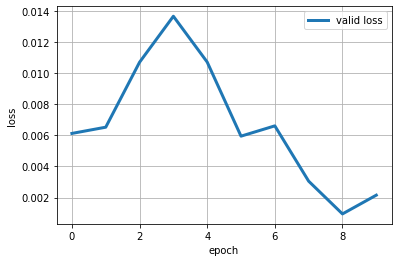

In [42]:
plt.plot(test_loss,linewidth=3,label="valid loss")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

#BiLSTM Model